In [1]:
import sys
import os
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
from IPython import display
from IPython.display import clear_output
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit
from time import time
import scipy.io
# from helpers import *
from PMFBSS import *
# np.random.seed(13)
%load_ext autoreload
%autoreload 2

In [3]:
os.chdir("..")
source_path = './OlshaussenData'
Y = scipy.io.loadmat(os.path.join(source_path,'imagepatcheselfwhitened.mat'))['imagepatches']

In [4]:
INPUT_STD = 0.5
for MixtureIndex in range(Y.shape[0]):
    stdx = np.std(Y[MixtureIndex,:])
    Y[MixtureIndex,:] = Y[MixtureIndex,:]/stdx*INPUT_STD

lambda_ = 1 - 1e-2/10
beta = 5
s_dim = 144
y_dim = Y.shape[0]

# Inverse output covariance
B = 1 * np.eye(s_dim)


debug_iteration_point = 1000
model = OnlinePMF(s_dim = s_dim, y_dim = y_dim, muW = 1e-4, lambda_ = lambda_,
                  beta = beta, B = B, neural_OUTPUT_COMP_TOL = 1e-6,
                  set_ground_truth = True, Sgt = None, A = None)

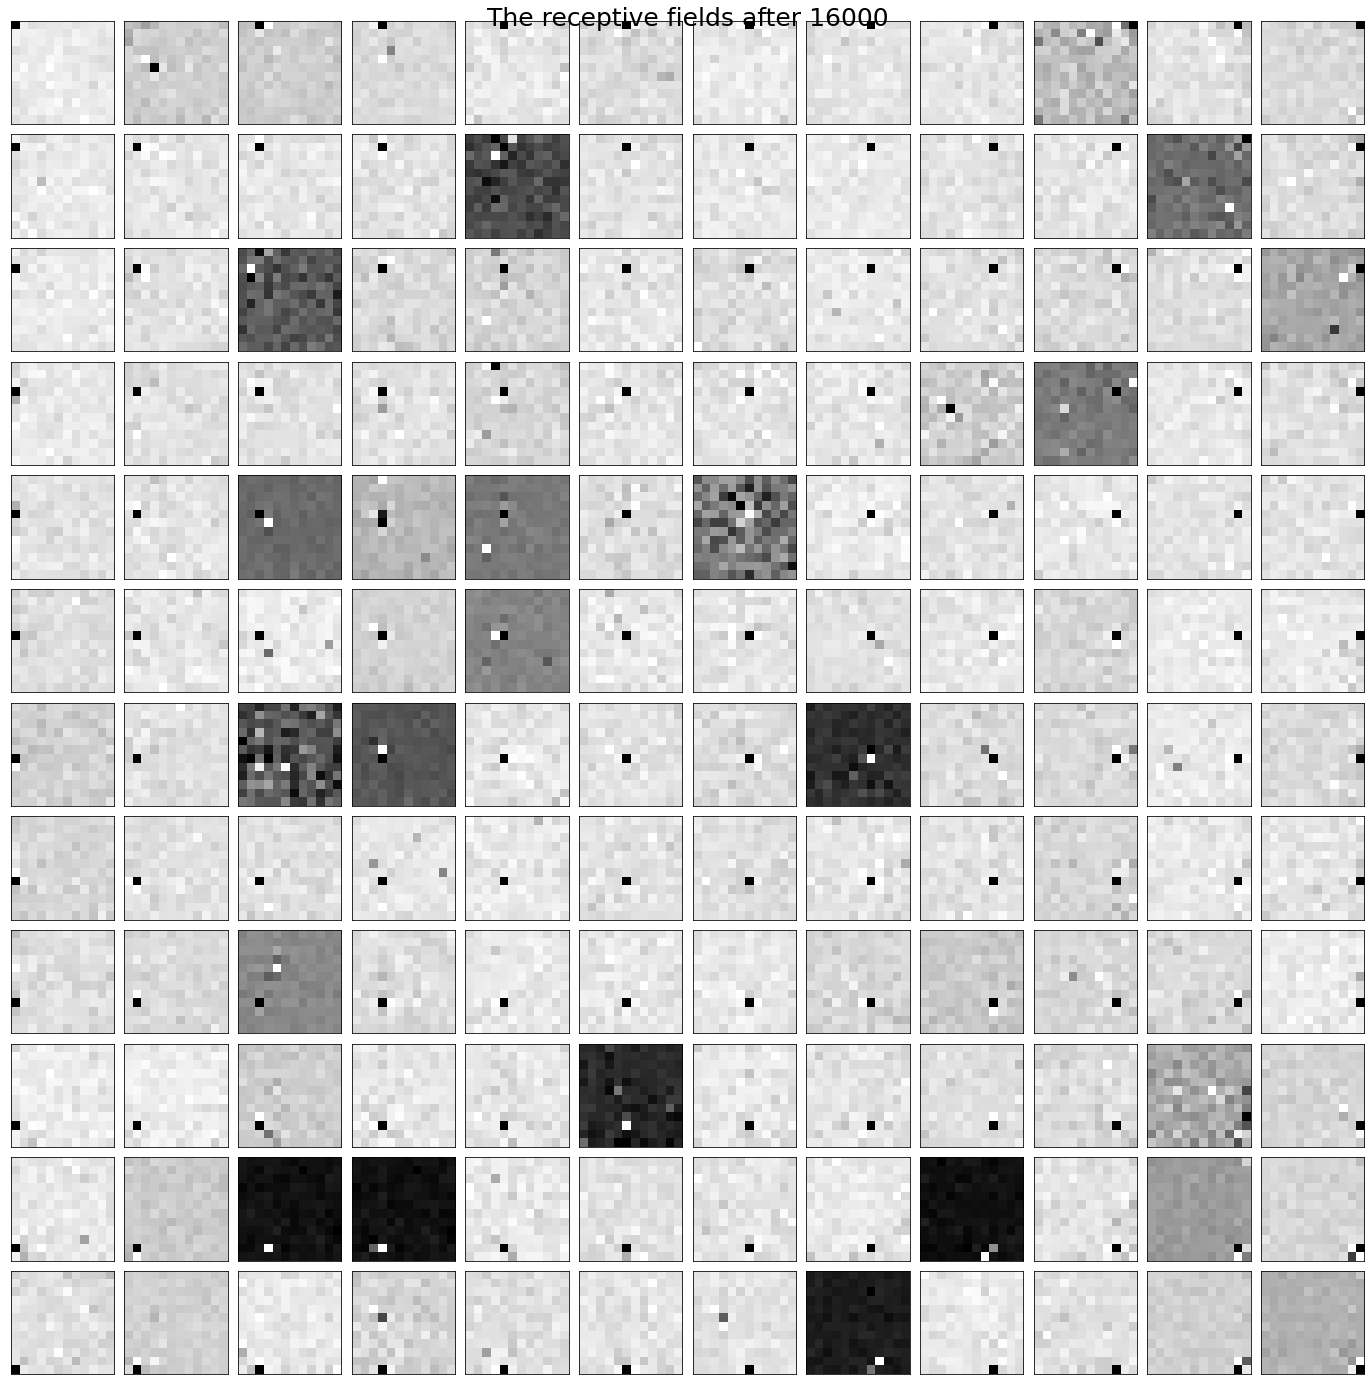

  5%|█▋                               | 16539/312500 [15:57<12:10:13,  6.75it/s]

In [ ]:
model.fit_batch_olshaussen(Y = Y, n_epochs = 1, neural_dynamic_iterations = 500,
                       plot_in_jupyter = True,
                       neural_lr_start = 0.1, neural_lr_stop = 1e-10,
                       debug_iteration_point = debug_iteration_point, 
                       shuffle = True)

In [ ]:
Wf = model.compute_overall_mapping(return_mapping = True)

In [ ]:
ZeroOneNormalizeData(np.reshape(Wf[0,:], (12,12)))